# The Multiple-Try Metropolis and its Variations

## Background


Markov Chain Monte Carlo (MCMC) has been extensively applied in many complicated computational problems in the bayesain paradigm. The conceptual understanding about this algorithm is to sample randomly from a defined distribution and to obtain an invariant distribution which is also the target distribution. 

The traditional Metropolis-Hastings algorithm (MH) is one of the representatices of MCMC. The algorithm is defined as follows,

r = \text{min} \left\{ 1, \frac{\pi(x_{t+1})T(x_{t+1},x_t)}{\pi(x_{t})T(x_{t},x_{t+1})}  \right\}
\end{equation*}
where $\pi(x_i)$ is the probability distribution of $x_i$; $T(.)$ is a markov transition function to generate a proposal $x_{t+1}$ given the current status of $x_t$; r is the probability of accepting $x_{t+1}$, also known as MH ratio.

Although compared to other bayesian methods, the standard MH has already been more computational approachable, it is still of 
probablistic. Its random proposed local move may arouse low convergence concern. In addition, trapping in local mode is also a major imperfection of this algorithm. A possible solution to enlarge the area for the proposal while it often comes along a small MH ratio. Hence, it is an ineffiecient algorithm. Liu, Liang and Wong (2000) proposed a series of variations of the standard MH algorithm and proved their effectiveness. 

The improved algorithm based on the traditional MH is called Multiple-try-Metropolis (MTM).  This method differs from the classical MH by proposing a mutiple candidate points rather than a simple point for each iteration. The sampling procedure will carry on based on each point's importance. As a result, the algorithm is more robust for effectively searching the optima.

This paper intends to research the MTM class to a further extent. The MTM and a variation combined with gibbs sampler will be tested first. These two algorithms are theretically discussed in previous literature. We will testify these two methods based on both artificial data or real dataset. An original variation which incorporates hamiltonian dynamics is proposed in the end. We hope that by doing empirical study on the algorithms proposed, the superiority of the MTM algorithm class over traditional MH algorithms can be proved. 

Hence, the major goal of the whole project is to explore the superiority of the MTM algorithm class. Since there is limited coding on these methods, we will concentrate on developing coding on these new algorithms rather optimizing a commonly coded algorithm. 

## The algorithm and its variations

In this section, we will introduce the multiple-try metropolis as well as its variations. In the traditional MH algorithm, we have the following settings. Firstly, a proposal function $T(x_i,x_{i+1})$ is defined, which clarifies the relationship between the $t$th trial and the $(t+1)$th candidate parameters. Next, a function used for evaluating the likelihood of a trial is defined as follows,
\begin{equation*}
w(x_i,x_{i+1}) = \pi(x_i) T(x_i,x_{i+1}) \lambda (x_i,x_{i+1})
\end{equation*}
where $\lambda (x_i,x_{i+1})$ is an adjustment function to enhance the power of the algorithm, which is nonnegative and symmetric.

Two basic requirements should be satisfied.
1. $T(x_i,x_{i+1})  > 0$ if and only if $T(x_{i+1},x_i)  > 0$
2. If $T(x_i,x_{i+1})  > 0$, then $\lambda (x_i,x_{i+1}) >0$.
The choices of $\lambda (x_i,x_{i+1})$ vary in different situations. 


#### Multiple-try Metropolis

**Algorithm**

The MTM algorithm can be achieved through 4 steps. The symbols are in line with the standard MH algorithm.  
1. Sample $k$ iid trials $x_{t+1}^{1},..., x_{t+1}^{k}$ from $T(x_i, .)$. Compute $w(x_{t+1}^{j},x_{t})$ for $j=1,...,k$.
2. Select $\mathbf{X} = x_{t+1}$ among the proposal set $\{x_{t+1}^{1},..., x_{t+1}^{k}\}$ with probability propotional to $\{w(x_{t+1}^{1},x_i),...,w(x_{t+1}^{k},x_i)\}$.
3. Sample $x_{\star}^{1},...,x_{\star}^{k-1}$ from the distribution $T(x_{t+1},.)$, and let $x_{\star}^{k}=x_{t}$.
4. Accept $x_{t+1}$ with probability 
\begin{equation*}
r = \text{min}\left\{ 1, \frac{w(x_{t+1}^{1},x_{t})+\cdot \cdot \cdot+w(x_{t+1}^{k},x_{t})} {w(x_{\star}^{1},x_{t+1})+\cdot \cdot \cdot+w(x_{\star}^{k},x_{t+1})} \right\}
\end{equation*}
and reject it with probability $1-r$. The quantity $r$ is called generlaized MH ratio. 

**Model Specification: Mixture Gaussian distribution**

The follwoing settings are used in our testification of the algorithm.

Initial state: 
$x_0^{i} = \text{Uni}(-5,5)\quad i = 1,2$

The proposal function $T(.)$:
$
\left(\begin{array}{c}
x_{t+1}^{1}  \\
x_{t+1}^{2} 
\end{array}
\right) = \left(\begin{array}{c}
x_{t}^{1}  \\
x_{t}^{2} 
\end{array}
\right)+\mathbf{N}_2(\mathbf{0},\sigma^2 \mathbf{I}_2)
$

The probability density function:
$$
\pi(x)=\frac{1}{3}\mathbf{N}_2(\mathbf{0},\mathbf{I}_2)+\frac{1}{3}\mathbf{N}_2\biggl\{\left(\begin{array}{c}
-6 \\
-6
\end{array}
\right),\left(\begin{array}{cc}
1 & 0.9 \\
0.9 & 1
\end{array}
\right)
\biggr\}+\frac{1}{3}\mathbf{N}_2\biggl\{\left(\begin{array}{c}
4 \\
4
\end{array}
\right),\left(\begin{array}{cc}
1 & -0.9 \\
-0.9 & 1
\end{array}
\right)
\biggr\}$$

The adjustment function $\lambda (x_i,x_{i+1}) = 1$




#### Griddy Gibbs Multiple-Try Metropolis
**Algorithm**

One of the major characteristic of the Gibbs sampler is that it is constructed based on the conditional distribution. However, in many cases, it is intracable to derive the conditional distribution for sampling. The griddy Gibbs sampler (Ritter and tanner (1992)) solves the computational challenge. Combined with MTM method, the MTM-Gibbs algorithm is designed to enhance the performance of the MTM.

Assume $\mathbf{X} = \mathbf{x}$ where $\mathbf{x}=(x(1),...,x(d))$, the algorithm of MTM-Gibbs is illustrated as follows,

1. Select any element of $\mathbf{x}$, say $x{i}$. Sample $y_1,..., y_k$ iid from a transition function $T(x(i),.)$ in line with the direction of $x(i)$, and calculate 
\begin{equation*}
w(y_j,x(i)) = \pi(x(1),...,x(i-1),y_j,x(i+1),...,x(d)) T(y_j,x(i)) \lambda(y_j,x(i)),
\end{equation*}
for j = 1,2,...,k.

2. Select $y=y_j$ with probability proportional to $w(y_j,x(i))$. Draw $k-1$ iid samples from T(y,.), denote by $s_1,...,s_{k-1}$. Make $s_k=x(i)$.

3. Compute the generalized Metropolis ratio r defined above, accept $y$ with probability $r$ and reject with $1-r$.

**Model Specification: Non-linear model**

The model used in testing the MTM-Gibbs is defined as follows,
$$y_i=\theta_1(1-\exp(-\theta_2x_i))+\varepsilon_i$$
where $y$ is the BOD at time $x$ with independent normal errors with constant variance $\sigma^2$.

The following settings are used in our testification of the algorithm.

Initial state: $\theta_i = \text{Uni}(-1,1) \quad i = 1,2$

The proposal function $T(.)$:
$\theta_{t+1}^{i} = \theta_{t+1}^{i} + \mathbf{N}(0,\sigma^2)\quad i = 1,2$

The adjustment function $\lambda (x_i,x_{i+1}) = 1$


#### Langevin-within-MTM
**Algorithm**

In this method, we combined the hamiltonian dynamics with MTM, in which langevin is one of the representatives of halmiltonian dynamics.    


**Model Specification: **


## Multiple-try Metropolis

### Toy example

In [4]:
# import numba
from numba import jit
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

#### Sampling from a two-dimensional mixture Gaussian Distribution $\pi(x)$
$$
\pi(x)=\frac{1}{3}\mathbf{N}_2(\mathbf{0},\mathbf{I}_2)+\frac{1}{3}\mathbf{N}_2\biggl\{\left(\begin{array}{c}
-6 \\
-6
\end{array}
\right),\left(\begin{array}{cc}
1 & 0.9 \\
0.9 & 1
\end{array}
\right)
\biggr\}+\frac{1}{3}\mathbf{N}_2\biggl\{\left(\begin{array}{c}
4 \\
4
\end{array}
\right),\left(\begin{array}{cc}
1 & -0.9 \\
-0.9 & 1
\end{array}
\right)
\biggr\}$$

In [5]:
def norm_mix(x):
    target = stats.multivariate_normal.pdf(x,[0,0],[[1,0],[0,1]])+stats.multivariate_normal.pdf(x,[-6,-6],[[1,0.9],[0.9,1]])+stats.multivariate_normal.pdf(x,[4,4],[[1,-0.9],[-0.9,1]])
    return target

# Need a contour plot for mixture Gaussian here

#### Method 1: Traditional Metropolis-Hastings sampler

In [6]:
n_iter = 50000
sigma = 1.5

# initial state
X = stats.uniform.rvs(loc=-5, scale=10, size=2, random_state=None)

# record the number of acceptances
accept = 0

# store the samples
MHsamples = np.zeros((n_iter,2))

# tuning parameter:
# sigma: variance of proposal

# MH sampler
for t in range(n_iter):
    # proposal: independent N(0,sigma)
    Y = X+stats.norm.rvs(0,sigma,2)
       
    # accept or reject
    u = stats.uniform.rvs(loc=0, scale=1, size=1)
    if u < norm_mix(Y)/norm_mix(X):
        X = Y
        accept += 1
    MHsamples[t] = X

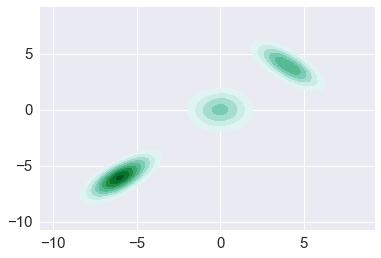

In [7]:
sns.kdeplot(MHsamples[:,0], MHsamples[:,1], camps='Reds', kind="kde",shade=True,shade_lowest=False)

#### Method 2: MTM sampler

In [132]:
n_iter = 10000
M = 10
sigma = 1.5

In [133]:
# initial state
X = stats.uniform.rvs(loc=-5, scale=10, size=2, random_state=None)

# record the number of acceptances
accept = 0

# store the samples
MTMsamples = np.zeros((n_iter,2))

# tuning parameter:
# sigma: variance of the proposal

# MTM sampler
for t in range(n_iter):
    # proposal: independent N(0,sigma)
    Y = np.tile(X,(M,1))+stats.norm.rvs(0,sigma,(M,2))
    
    # proposal importance probabilities
    w_prop = norm_mix(Y)
    
    # index of the chosen trial point
    ix = np.random.choice(M, 1, p=w_prop/sum(w_prop))
    
    # draw M-1 samples 
    X_star = np.tile(Y[ix],(M-1,1))+stats.norm.rvs(0,sigma,(M-1,2))
    # add X as M th sample
    X_star = np.vstack((X_star,X))
    
    # back importance probabilities
    w_back = norm_mix(X_star)
    
    # accept or reject
    u = stats.uniform.rvs(loc=0, scale=1, size=1)
    if u < sum(w_prop)/sum(w_back):
        X = Y[ix]
        accept += 1
    MTMsamples[t] = X

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


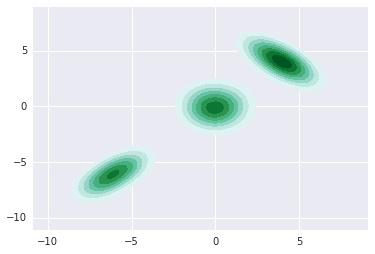

In [134]:
sns.kdeplot(MTMsamples[:,0], MTMsamples[:,1], camps='Reds', kind="kde",shade=True,shade_lowest=False)

# Also need to compare autocorrelation, acceptance here

## Variation 1: Griddy Gibbs Multiple-Try Metropolis

### Real dataset: Biochemical Oxygen Demand (BOD) originally from Marske (1967)

In [18]:
data = pd.read_table('BOD.txt',sep='|')
data.head()

,time,demand
0,1,8.3
1,2,10.3
2,3,19.0
3,4,16.0
4,5,15.6


### Non-linear model was fitted based on the analysis from Bates, D.M. and Watts, D.G. (1988)

The non-linear model is given by
$$y_i=\theta_1(1-\exp(-\theta_2x_i))+\varepsilon_i$$
where $y$ is the BOD at time $x$ with independent normal errors with constant variance $\sigma^2$.

In [27]:
x = data.ix[:,0]
y = data.ix[:,1]


In [31]:
@jit
def post(theta1, theta2):
    n = len(x)
    if theta1 > -20 and theta1 < 50 and theta2 > -2 and theta2 < 6:
        posterior = sum((y - theta1*(1-np.exp(-theta2*x)))**2)**(-(n/2)+1)
    else: posterior = 0
    return posterior

In [32]:
xaxis = np.arange(-20.0, 40.0, 0.5)
yaxis = np.arange(-2.0, 4.0, 0.05)
Z = np.reshape(np.array([post(a,b) for a in xaxis for b in yaxis]),newshape=[120,120])

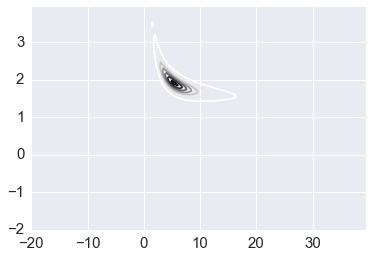

In [33]:
X, Y = np.meshgrid(xaxis, yaxis)
plt.figure()
plt.contour(X, Y, Z)

In [34]:
n_iter = 10000
M = 10
# tuning parameter:
# sigma1, sigma2: variance of the proposal
sigma1 = 30
sigma2 = 3

In [11]:
# MTM-Gibbs sampler
def MTMG(n_iter, M, sigma1, sigma2, post):
    
    # initial state
    theta1, theta2 = stats.uniform.rvs(loc=-1, scale=2, size=2, random_state=None)

    # record the number of updates for each component
    count1 = count2 = 0

    # record the number of acceptances
    accept1 = accept2 = 0
    
    # store the samples
    MTMGsamples = np.zeros((n_iter,2))

    for t in range(n_iter):
    
        # randomly pick the updating component
        index = stats.bernoulli.rvs(0.5,1)
    
        # update theta1
        if index == 1:
        
            # record number of updating
            count1 += 1
        
            # proposal: independent N(0,sigma1^2)
            theta1_prop = np.repeat(theta1,M)+stats.norm.rvs(0,sigma1,M)
    
            # proposal importance probabilities
            w_prop = np.array([post(theta1,theta2) for theta1 in theta1_prop])
     
            # index of the chosen trial point
            ix = np.random.choice(M, 1, p=w_prop/sum(w_prop))
    
            # draw M-1 samples 
            theta1_star = np.repeat(theta1_prop[ix],M-1)+stats.norm.rvs(0,sigma1,M-1)
            # add theta1 as M th sample
            theta1_star = np.append(theta1_star,theta1)
    
            # back importance probabilities
            w_back = np.array([post(theta1,theta2) for theta1 in theta1_star])
    
            # accept or reject
            u = stats.uniform.rvs(loc=0, scale=1, size=1)
            if u < sum(w_prop)/sum(w_back):
                theta1 = theta1_prop[ix]
                accept1 += 1
            
        # update theta2
        else: 
        
            # record number of updating
            count2 += 1
        
            # proposal: independent N(0,sigma2^2)
            theta2_prop = np.repeat(theta2,M)+stats.norm.rvs(0,sigma2,M)
    
            # proposal importance probabilities
            w_prop = np.array([post(theta1,theta2) for theta2 in theta2_prop])
    
            # index of the chosen trial point
            ix = np.random.choice(M, 1, p=w_prop/sum(w_prop))
    
            # draw M-1 samples 
            theta2_star = np.repeat(theta2_prop[ix],M-1)+stats.norm.rvs(0,sigma2,M-1)
            # add theta2 as M th sample
            theta2_star = np.append(theta2_star,theta2)
    
            # back importance probabilities
            w_back = np.array([post(theta1,theta2) for theta2 in theta2_star])
    
            # accept or reject
            u = stats.uniform.rvs(loc=0, scale=1, size=1)
            if u < sum(w_prop)/sum(w_back):
                theta2 = theta2_prop[ix]
                accept2 += 1
            
        MTMGsamples[t] = theta1, theta2
    
    return MTMGsamples, count1, count2, accept1, accept2

In [47]:
MTMGsamples, count1, count2, accept1, accept2 = MTMG(n_iter=n_iter, M=M, sigma1=sigma1, sigma2=sigma2, post=post)

/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


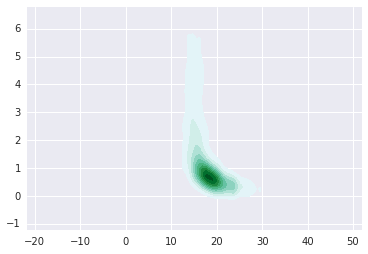

In [48]:
sns.kdeplot(MTMGsamples[:,0], MTMGsamples[:,1], camps='Reds', kind="kde",shade=True,shade_lowest=False)

## Variation 2: Langevin-within-MTM

In [161]:
# @jit
def U(x, y):
    if x > -1 and x < 1 and y > -1 and y < 1:
        energy  = (x*np.sin(20*y)+y*np.sin(20*x))**2+(x*np.cos(10*y)-y*np.sin(10*x))**2
    else: energy = 1e10
    return energy

In [52]:
# @jit
def grad_U(x,y):
    if x > -1 and x < 1 and y > -1 and y < 1:
        grad = 2*(x*np.sin(20*y)+y*np.sin(20*x))*np.array([np.sin(20*y)+20*y*np.cos(20*x),20*x*np.cos(20*y)+np.sin(20*x)])+2*(x*np.cos(10*y)-y*np.sin(10*x))*np.array([np.cos(10*y)-10*y*np.cos(10*x),-10*x*np.sin(10*y)-np.sin(10*x)])
    else: grad = np.array([0,0])
    return grad

In [152]:
xaxis = np.arange(-1, 1, 0.01)
yaxis = np.arange(-1, 1, 0.01)
Z = np.reshape(np.array([U(a,b) for a in xaxis for b in yaxis]),newshape=[200,200])

/usr/lib/python3/dist-packages/matplotlib/collections.py:609: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


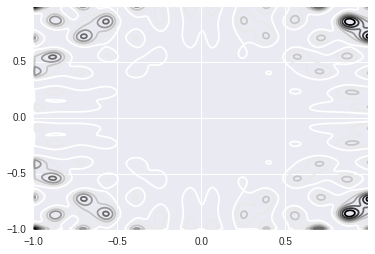

In [153]:
X, Y = np.meshgrid(xaxis, yaxis)
plt.figure()
plt.contour(X, Y, Z)

In [169]:
help(np.random.randn)

Help on built-in function randn:

randn(...) method of mtrand.RandomState instance
    randn(d0, d1, ..., dn)
    
    Return a sample (or samples) from the "standard normal" distribution.
    
    If positive, int_like or int-convertible arguments are provided,
    `randn` generates an array of shape ``(d0, d1, ..., dn)``, filled
    with random floats sampled from a univariate "normal" (Gaussian)
    distribution of mean 0 and variance 1 (if any of the :math:`d_i` are
    floats, they are first converted to integers by truncation). A single
    float randomly sampled from the distribution is returned if no
    argument is provided.
    
    This is a convenience function.  If you want an interface that takes a
    tuple as the first argument, use `numpy.random.standard_normal` instead.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, should be all positive.
        If no argument is given a single Python float is ret

In [175]:
def Langevin(U, grad_U, eps, x0, y0, M):
    
    x = x0
    y = y0
    
    p = np.random.randn(2*M).reshape(M,2)
    current_p = p
    
    p = p - eps * grad_U(x,y)/2
    
    XY = [x, y] + eps * p
            
    p = p - eps * np.array([grad_U(a,b) for [a,b] in XY])/2
    
    p = -p
    
    proposed_U = np.array([U(a,b) for [a,b] in XY])
    proposed_K = np.sum(p**2,axis=1)/2
        
    w = np.exp(-proposed_U-proposed_K)
        
    return XY, w

In [194]:
n_iter = 10000
M = 30
# tuning parameter:
eps=0.1

In [195]:
# initial state
X = stats.uniform.rvs(loc=-1, scale=2, size=2, random_state=None)
X = np.array([-0.90,-0.93])

# record the number of acceptances
accept = 0

# store the samples
MTMsamples = np.zeros((n_iter,2))

# tuning parameter:
# sigma: variance of the proposal

# MTM sampler
for t in range(n_iter):
        
    # proposal importance probabilities
    Y, w_prop = Langevin(U, grad_U, eps=eps, x0=X[0], y0=X[0], M=M)
    
    # index of the chosen trial point
    ix = np.random.choice(M, 1, p=w_prop/sum(w_prop))
    
    # draw M-1 samples 
    X_star, w_back = Langevin(U, grad_U, eps=eps, x0=Y[ix][0][0], y0=Y[ix][0][1], M=M-1)
    
    # add X as M th sample
    X_star = np.vstack((X_star,X))
    
    # back importance probabilities
    p = (X-Y[ix])/eps
    p = p - eps * grad_U(X[0],X[1])/2

    w_back = np.append(w_back,np.exp(-U(X[0],X[1])-sum((p**2)[0]/2)))
    
    # accept or reject
    u = stats.uniform.rvs(loc=0, scale=1, size=1)
    if u < sum(w_prop)/sum(w_back):
        X = Y[ix][0]
        accept += 1
    MTMsamples[t] = X

In [196]:
MTMsamples,accept

(array([[-0.95723844, -0.95059718],
        [-0.91548264, -0.96598202],
        [-0.97170262, -0.8741936 ],
        ..., 
        [ 0.02498359, -0.01124859],
        [ 0.13994389,  0.09320168],
        [ 0.21848599,  0.21490649]]), 4554)

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


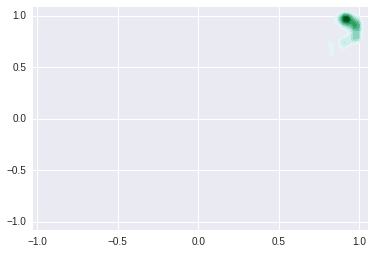

In [197]:
sns.kdeplot(MTMsamples[:,0], MTMsamples[:,1], camps='Reds', kind="kde",shade=True,shade_lowest=False)